# This is the modeling notebook w.r.t. my presentation. My Kaggle notebooks are elsewhere


### Problem Statement:
A company that flips houses has hired me to to analyze housing data in Ames, IA to determine the most cost-effective remodeling targets to quickly build equity in houses. They want me to specifically identify features to look for in buying houses (that typically lower a house's sale price) and what exactly to improve before selling to get the best return on their investment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from local_EDA import heat

# Let's model!

In [2]:
df = pd.read_csv('./datasets/train_clean_3.csv')

In [48]:
null_model = np.full_like(df.SalePrice, df.SalePrice.mean())

mean_squared_error(df.SalePrice, null_model, squared=False)

To start, our null model RMSE is 79,263. Should be easy to beat.

In [3]:
X = df.drop(columns='SalePrice')
y = df.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [4]:
model = LinearRegression()

In [5]:
cross_val_score(model, X_train, y_train)

array([0.83860832, 0.81279178, 0.83810149, 0.84231598, 0.81201162])

In [6]:
cross_val_score(model, X_train, y_train).mean()

0.8287658374949821

Our cross-val scores look good, mean score at .83, all five cross-validations are within a reasonable range. (I.e. not getting any weird k-folds)

Let's model!

I'll be using a regular old multiple linear regression for this one, as interpretability is non-negotiable to satisfy my problem statement.

In [7]:
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_hat = model.predict(X_test)

RMSE of 32,287 is not too bad, especially considering the simplicity of my model. Also, this outperforms the null model, so that's nice.

In [9]:
mean_squared_error(y_test, y_hat, squared=False)

32287.61924083752

Train/test R2 scores are pretty close,(.84, .83) and both are pretty good. This indicates our model is fit just right, neither high bias nor high variance. Could be better, but I'm happy

In [10]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.840758731244402, 0.8280539967463036)

In [11]:
coefs = list(zip(X.columns, model.coef_))
coefs

[('comp_shingle_roof', -6711.490438422119),
 ('masonry_area', 88.64788299602353),
 ('bsmt_cond', -88.21964332024699),
 ('forced_air_or_other', 12637.463251088931),
 ('heating_qual', 591.1991121675127),
 ('has_central_air', -3574.8190647596202),
 ('electrical_qual', -172.82484026726567),
 ('functionality', 424.52944093631004),
 ('num_fireplaces', -2914.1738001806584),
 ('fireplace_qual', 987.6068092134278),
 ('kitchen_qual', 3452.740764514964),
 ('driveway_paved', 3066.4242473180443),
 ('has_wood_deck', 6544.294636676212),
 ('has_open_porch', 7424.149743463934),
 ('has_encl_porch', -5415.046895998937),
 ('has_3ssn_porch', 4621.162184108374),
 ('has_screen_porch', 10489.044047759973),
 ('Fence', -924.7538696303061),
 ('sqft_per_room', 2.226147098050955),
 ('tot_fin_sqft', 51.59336793846995),
 ('bsmt_fin_int', -446.21199516335315),
 ('garage_qc', 91.42391179313833),
 ('pool_qual_int', 3.1147522540666204),
 ('exterior_qc', 98.71802756342552),
 ('overall_qc', 1278.1203508988829),
 ('siding_

In [12]:
resids = y_test - y_hat

Let's take a look at our residuals to ensure our LINE assumptions are met:

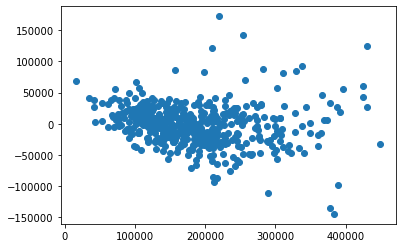

In [13]:
plt.scatter(y_hat, resids);

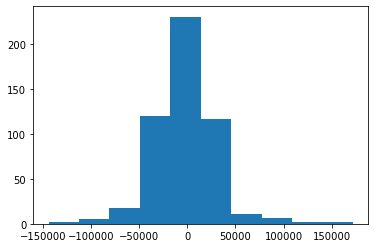

In [14]:
plt.hist(resids);

L - Linearity of features (mostly satisfied)

I - Independence (satisfied)

N - Normality of residuals (satisfied)

E - Equality of variance (satisfied)

M - No multicollinearity (satisfied)

Residuals look good! Our LINE assumptions are intact, so let's start interpreting our coefficients

In [15]:
coefs.sort(key = lambda x: x[1])

In [16]:
coefs

[('siding_type_Wd Sdng', -9354.290549225196),
 ('comp_shingle_roof', -6711.490438422119),
 ('has_encl_porch', -5415.046895998937),
 ('siding_type_Plywood', -5160.96426916059),
 ('has_central_air', -3574.8190647596202),
 ('num_fireplaces', -2914.1738001806584),
 ('siding_type_MetalSd', -1712.514011528426),
 ('Fence', -924.7538696303061),
 ('bsmt_fin_int', -446.21199516335315),
 ('electrical_qual', -172.82484026726567),
 ('bsmt_cond', -88.21964332024699),
 ('sqft_per_room', 2.226147098050955),
 ('pool_qual_int', 3.1147522540666204),
 ('tot_fin_sqft', 51.59336793846995),
 ('masonry_area', 88.64788299602353),
 ('garage_qc', 91.42391179313833),
 ('exterior_qc', 98.71802756342552),
 ('functionality', 424.52944093631004),
 ('heating_qual', 591.1991121675127),
 ('fireplace_qual', 987.6068092134278),
 ('overall_qc', 1278.1203508988829),
 ('driveway_paved', 3066.4242473180443),
 ('kitchen_qual', 3452.740764514964),
 ('has_3ssn_porch', 4621.162184108374),
 ('siding_type_Other', 5422.119072078509)

### Preliminary findings:

These were my highest-correlated features:

1. Wood siding vs. Hardboard siding

    -*All else being equal*, we can reasonably expect that wood siding will reduce the sale price of a home (compared to hardboard siding) by about \$9354
    
2. Composite shingle roof vs. other

    -This one is kinda tough to interpret. Only ~1\% of our dataset was not composite shingles, so I think it's safe to assume that we have an outlier somewhere with a non-shingled roof, worth about \$6711 more than our average composite shingled house
    
3. Enclosed porch

    -*All else being equal*, we can reasonably expect that a house with an enclosed porch is worth about \$5415 less than a house with no porch at all.
    
4. Plywood siding

    -*All else being equal*, we can reasonably expect that plywood siding will reduce the sale price of a home (compared to hardboard siding) by about \$5160
    
5. Stone masonry veneer vs. common brick
    
    -*All else being equal*, we can reasonably expect that a house with stone masonry on the exterior will sell for about \$26283 more than a house with common brick veneer
    
6. No masonry vs. common brick

    -*All else being equal*, and interestingly, we can expect that a house with no masonry at all will sell for about \$19024 more than a house with common brick veneer
    
7. Forced air

    -*All else being equal*, we can reasonably expect that adding forced air heating to a house that previously did not have forced air will increase sale price by about \$12637
    
8. Vinyl siding vs hardboard

    -*All else being equal*, we can reasonably expect that a house with vinyl siding will sell for about \$10926 more than a house with hardboard siding
 


Honorable mentions:

1. Driveway

    -*All else being equal*, we can reasonably expect that paving an unpaved driveway will add about \$3066 to the sale price of a house
    
2. Kitchen quality

    -*All else being equal*, we can reasonably expect that for every one unit increase in kitchen quality (unclear how kitchens were rated by the data collectors, other than Fair-Excellent) we will see about a \$3452 increase in sale price
    

Forgive my 32 scatter plots, I wanted to double-check my coefficients because some of them didn't make much sense.

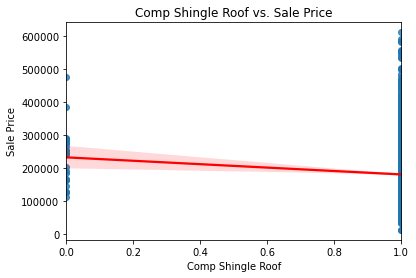

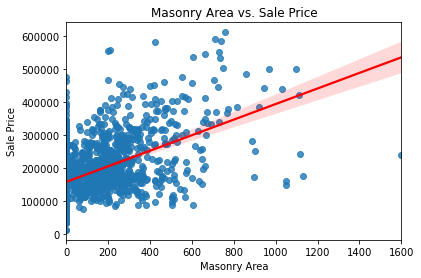

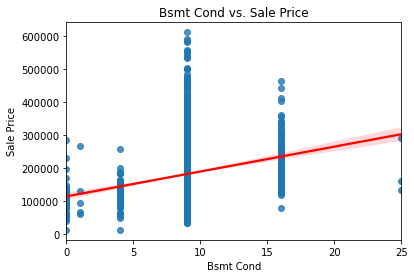

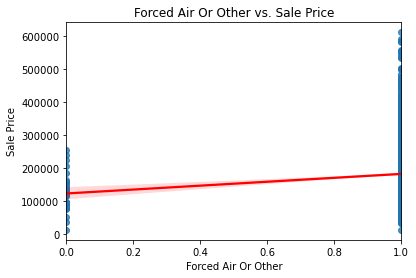

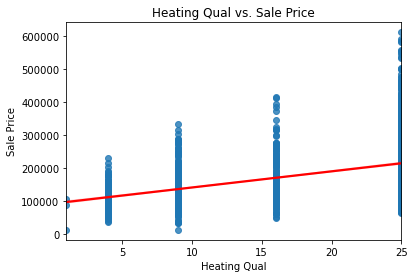

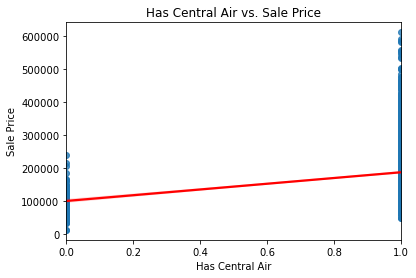

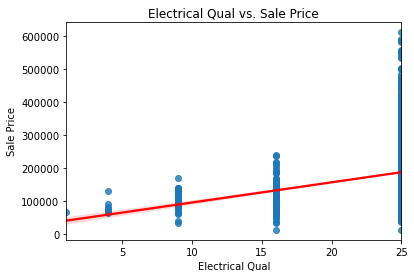

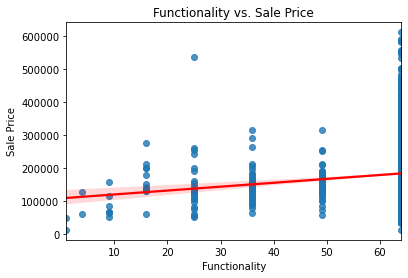

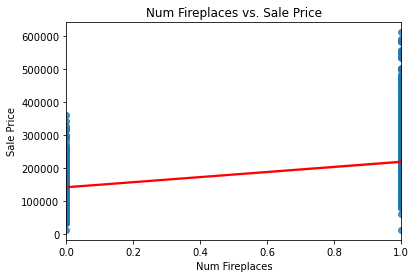

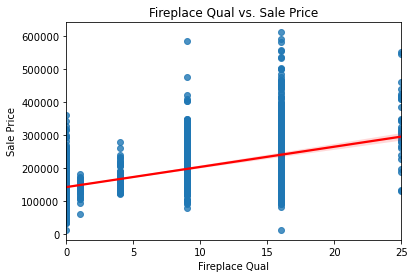

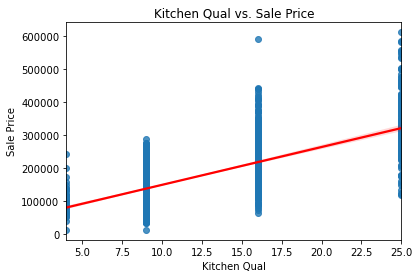

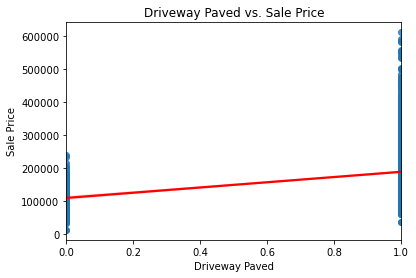

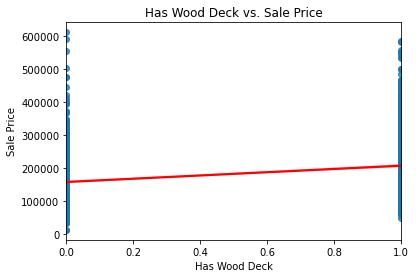

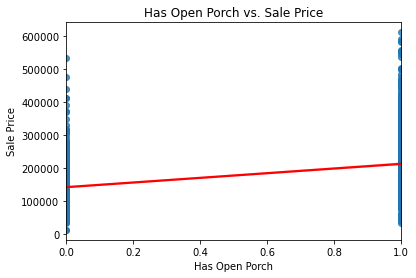

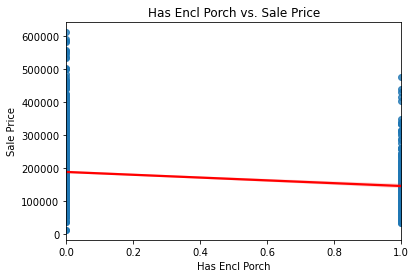

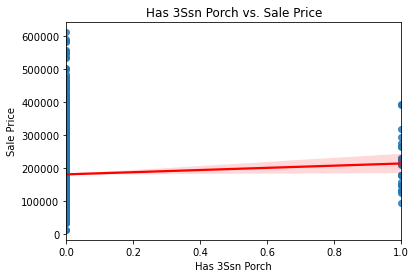

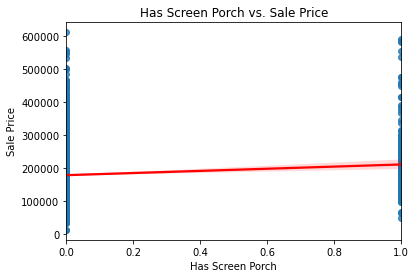

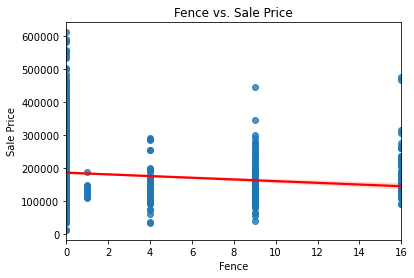

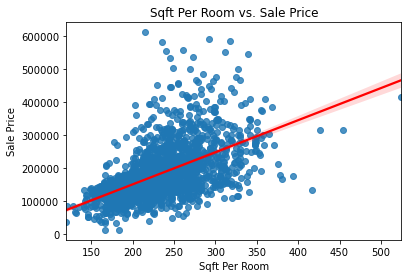

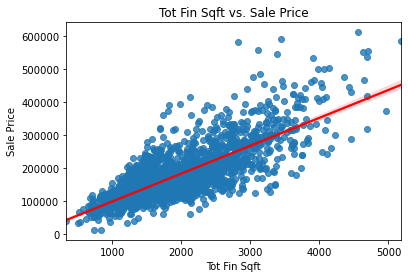

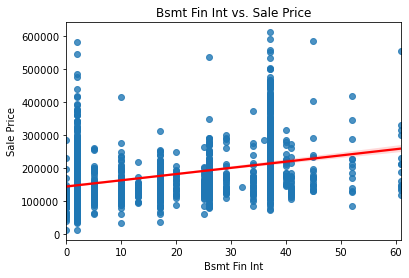

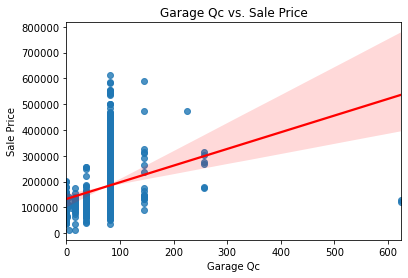

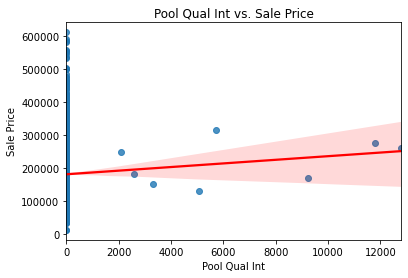

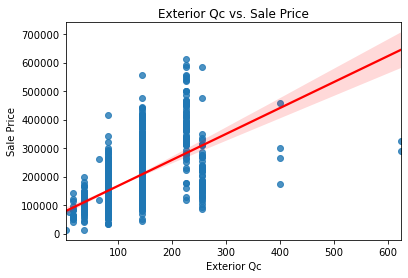

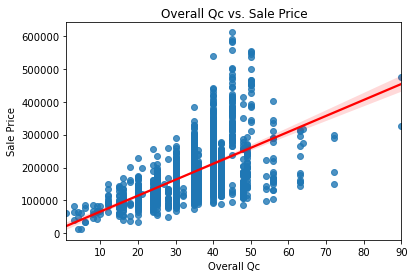

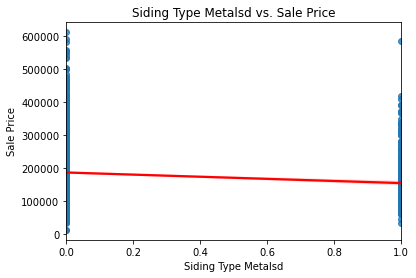

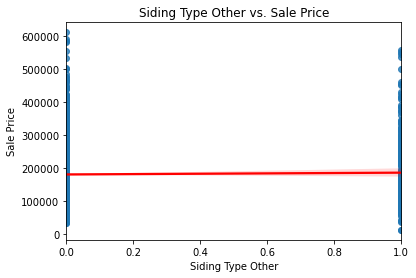

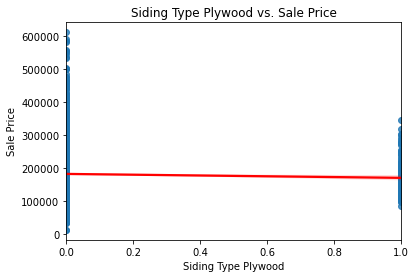

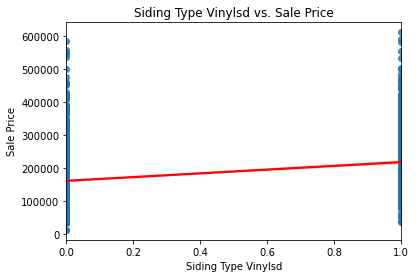

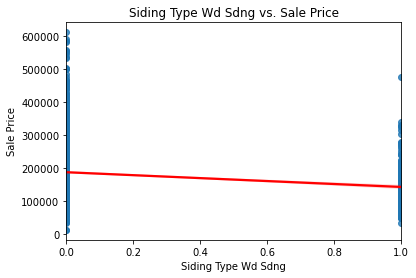

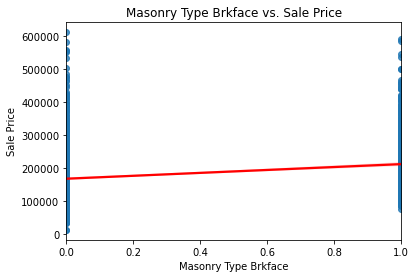

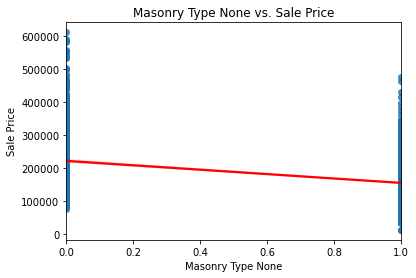

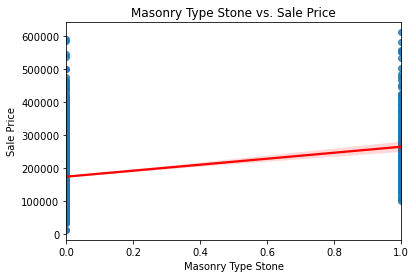

In [17]:
for x in X.columns:
    sns.regplot(data=df, x=x, y='SalePrice', line_kws={'color':'red'})
    x = x.replace('_', ' ').title()
    plt.xlabel(x)
    plt.ylabel('Sale Price')
    plt.title(f'{x} vs. Sale Price')
    plt.show()

Most of these coefficients are pretty good, some don't actually correlate very well. 

Overall quality, exterior quality, square feet, kitchen quality, fireplace quality, heating were all decently linear correlations.

Making DataFrames out of related features for ease of visualization:

In [18]:
siding = [i for i in coefs if 'siding' in i[0]]

In [19]:
siding

[('siding_type_Wd Sdng', -9354.290549225196),
 ('siding_type_Plywood', -5160.96426916059),
 ('siding_type_MetalSd', -1712.514011528426),
 ('siding_type_Other', 5422.119072078509),
 ('siding_type_VinylSd', 10926.823560744548)]

In [20]:
siding_df = pd.DataFrame(siding, columns=['Type', 'Amount'])

In [21]:
siding_df.head()

,Type,Amount
0,siding_type_Wd Sdng,-9354.290549
1,siding_type_Plywood,-5160.964269
2,siding_type_MetalSd,-1712.514012
3,siding_type_Other,5422.119072
4,siding_type_VinylSd,10926.823561


In [22]:
siding_df.Type = ['Wood', 'Plywood', 'Metal', 'Other', 'Vinyl']

In [23]:
sns.set_style('darkgrid')

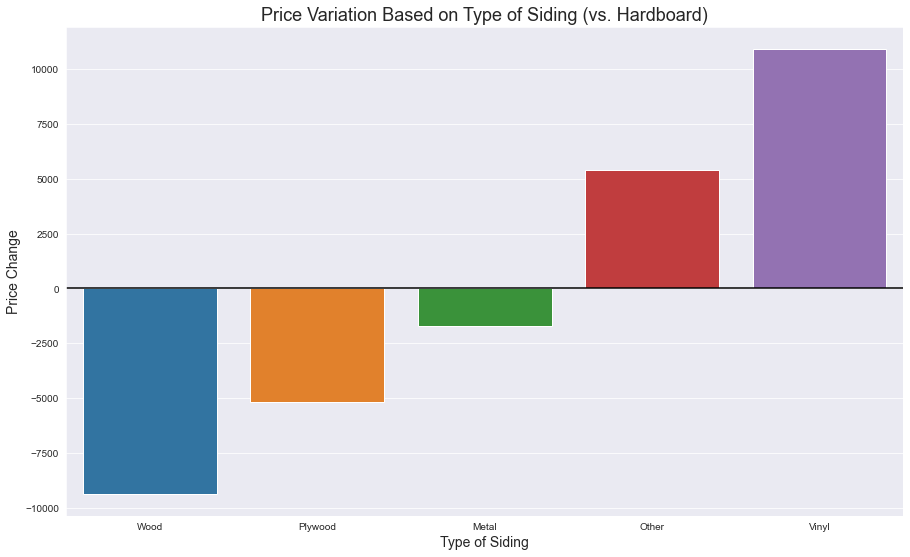

In [24]:
plt.figure(figsize=(15, 9))
sns.barplot(data=siding_df, x='Type', y='Amount')
plt.title('Price Variation Based on Type of Siding (vs. Hardboard)', {'fontsize': 18})
plt.axhline(c='black')
plt.xlabel('Type of Siding', {'fontsize': 14})
plt.ylabel('Price Change', {'fontsize': 14});

*Ceteris paribus*, vinyl siding will reasonably get you ~12,000 more on sale price compared to hardboard, and hardboard ~9,000 more than wood siding

In [25]:
porches = [i for i in coefs if 'porch' in i[0]]

In [26]:
porches += [i for i in coefs if 'deck' in i[0]]

In [27]:
porches

[('has_encl_porch', -5415.046895998937),
 ('has_3ssn_porch', 4621.162184108374),
 ('has_open_porch', 7424.149743463934),
 ('has_screen_porch', 10489.044047759973),
 ('has_wood_deck', 6544.294636676212)]

In [28]:
porch_df = pd.DataFrame(porches, columns=['Type', 'Amount'])

In [29]:
porch_df.head()

,Type,Amount
0,has_encl_porch,-5415.046896
1,has_3ssn_porch,4621.162184
2,has_open_porch,7424.149743
3,has_screen_porch,10489.044048
4,has_wood_deck,6544.294637


In [30]:
porch_df.Type = ['Enclosed Porch', '3 Season Porch', 'Open Porch', 'Screen Porch', 'Wood Deck']

In [31]:
porch_df.head()

,Type,Amount
0,Enclosed Porch,-5415.046896
1,3 Season Porch,4621.162184
2,Open Porch,7424.149743
3,Screen Porch,10489.044048
4,Wood Deck,6544.294637


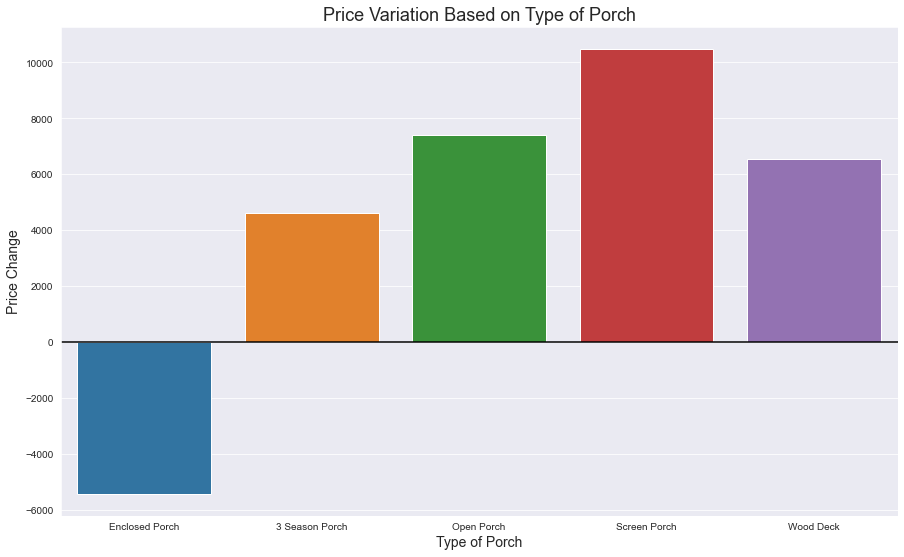

In [32]:
plt.figure(figsize=(15, 9))
sns.barplot(data=porch_df, x='Type', y='Amount')
plt.title('Price Variation Based on Type of Porch', {'fontsize': 18})
plt.axhline(c='black')
plt.xlabel('Type of Porch', {'fontsize': 14})
plt.ylabel('Price Change', {'fontsize': 14});

*Ceteris paribus*, a house with a screen porch will sell for about 11K more than the same house without a porch. Interestingly, enclosed porches tend to reduce house prices. If I had more time, this would merit closer inspection. 

In [33]:
df.has_encl_porch.value_counts()

0    1721
1     327
Name: has_encl_porch, dtype: int64

More graphs and charts because I couldn't decide what I wanted to put on my slideshow

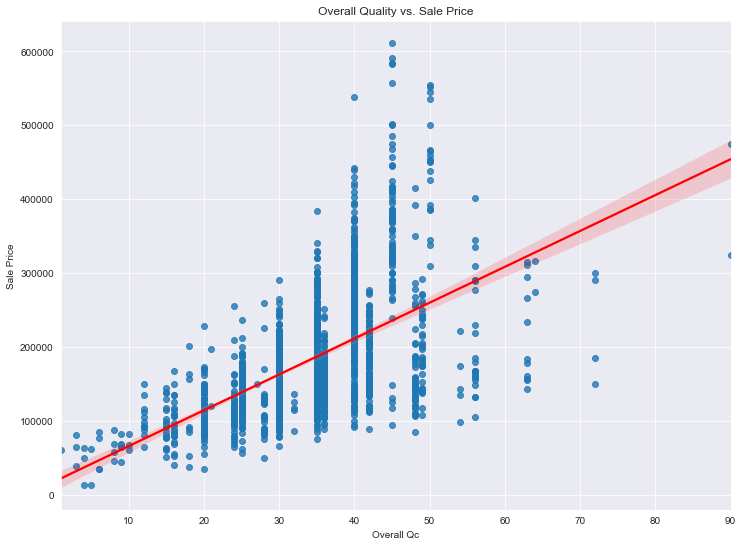

In [34]:
x = 'overall_qc'
plt.figure(figsize=(12, 9))
sns.regplot(data=df, x=x, y='SalePrice', line_kws={'color':'red'})
x = x.replace('_', ' ').title()
plt.xlabel(x)
plt.ylabel('Sale Price')
plt.title('Overall Quality vs. Sale Price')
plt.show()

Ended up not using this because 'overall quality' is hard to quantify, and therefore difficult to fit into the exploration of my problem statement. But what a gorgeous graph!

C:\Users\c24th\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


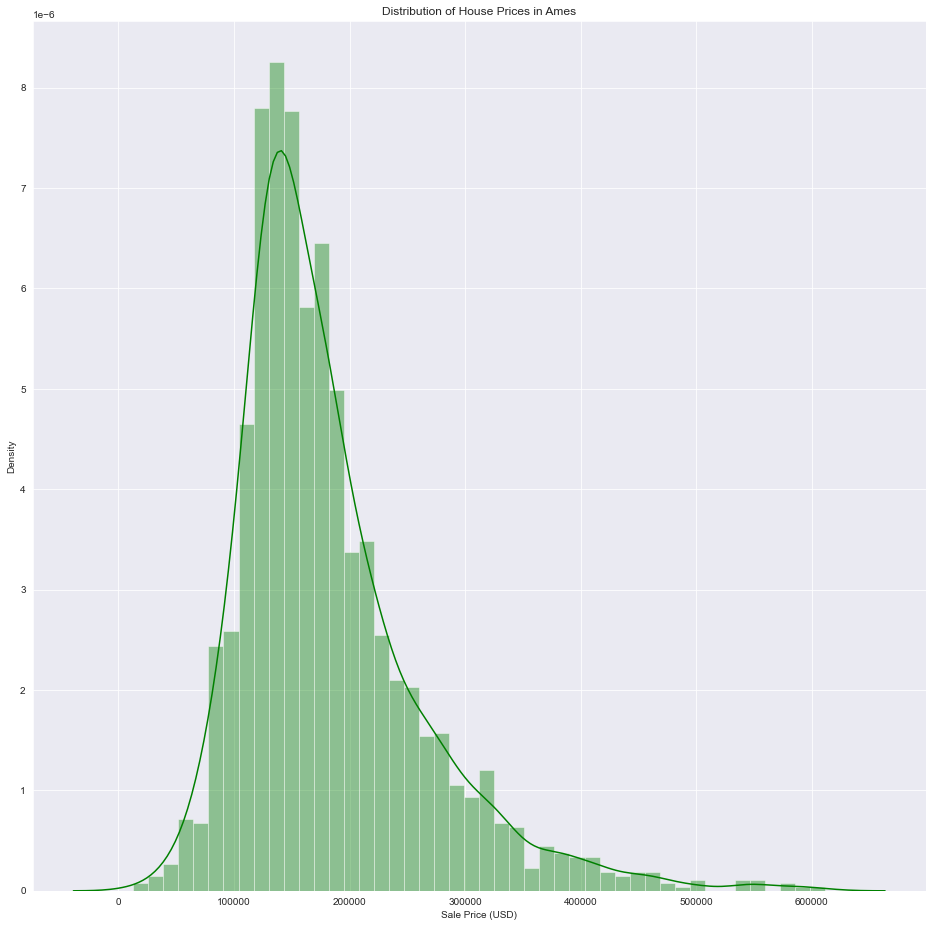

In [36]:
plt.figure(figsize=(16, 16))
sns.distplot(df.SalePrice, kde=True, color='green')
plt.title('Distribution of House Prices in Ames')
plt.xlabel('Sale Price (USD)')
plt.show();

This one I did use; it shows the distribution of our `SalePrice` variable. As you can see, the distribution is almost normal, except for the right skew. This indicates some high-value outliers.

## Conclusions

Ultimately, I'm not sure how useful this model would be in satisfying my problem statement, as my RMSE was ~32,000. This margin of error is more than double my most valuable feature, so take these top three recommendations with 32,000 grains of salt:

   1. Siding -- Vinyl siding added the most value to a house of any other siding (compared to hardboard). Wood siding subtracted the most value. Recommendation: Look for houses with outdated/otherwise gross siding and slap some vinyl on that bad boy.
    
    
   2. Furnace -- Having a standard forced-air furnace added a whopping 12,000 USD (*cp*) to sale price. On average, installing a furnace costs (apparently) about 2,000 USD. Recommendation: Buy houses with old/outdated/underperforming/inefficient furnaces, and replace them with nice ones.
   
   
   3. Kitchen -- Kitchen remodelling is anecdotally one of the best ways to add equity to your home. However, there is a lot of disagreement on what the average kitchen remodel costs. This statistical murkiness, coupled with the arcane rating system used by the assessor's office, make it hard to say for sure if kitchens are a good target for flipping houses. Recommendation: Take kitchens on a case-by-case basis. If a kitchen is crappy enough, and you can upgrade it economically enough, you can add significant equity to a house.